# **Monte Carlo Simulation of Premier League**






*   Usman Zahoor (22201517)
*   Tejaswi Singh Chauhan (22206296)




---



---





# Loading the libraries

In [1]:
## Loading Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson


# Importing the dataset from football data UK


In [2]:
## Importing Dataset functions

def generate_seasons(start_year, end_year):
    seasons = [f"{str(y)[-2:]}{str(y+1)[-2:]}" for y in range(start_year, end_year)]
    return seasons

def scrape_past_seasons_data(season):

    url_prem = "https://www.football-data.co.uk/mmz4281/" + str(season) + "/E0.csv"

    data = pd.read_csv(url_prem,usecols=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HY','AY','HR','AR','HC','AC','B365H','B365D','B365A'])
    data.columns = ['Date', 'HomeTeam', 'AwayTeam','H_goals','A_goals','Result','H_shots','A_shots','H_shots_target','A_shots_target','H_yellow','A_yellow','H_red','A_red','H_Corners','A_Corners','Bet365odd_H','Bet365odd_D','Bet365odd_A']

    ## Creating new data point Booking Point
    data['H_yellow'] = data['H_yellow'].fillna(0)
    data['A_yellow'] = data['A_yellow'].fillna(0)
    data['H_red'] = data['H_red'].fillna(0)
    data['A_red'] = data['A_red'].fillna(0)
    data['H_BookingPoints'] = 10*(data['H_yellow'].astype(int))+25*(data['H_red'].astype(int))
    data['A_BookingPoints'] = 10*(data['A_yellow'].astype(int))+25*(data['A_red'].astype(int))

    ## Creating the Shot accuracy data point
    data['H_Shot_Acc'] = data['H_shots_target']/data['H_shots']
    data['A_Shot_Acc'] = data['A_shots_target']/data['A_shots']

    ## Adding a datapoint Game to distinguish between matches in different seasons
    data['Game'] = data['HomeTeam']+'_'+data['AwayTeam']
    data['Season'] = season

    ## Dropping yellow card and red card data points from dataset
    data = data.drop(['H_yellow','A_yellow','H_red','A_red'],axis=1)

    return data

In [6]:
## Dataset importing function

def football_results(season_list):
    division = "epl"
    data_dict = {}

    for season in season_list:
        data_values = scrape_past_seasons_data(season)
        data_key = f"{division}{season}"
        data_dict[data_key] = data_values

    return data_dict

In [7]:
## Getting the seasons list from 2015/16 season to 2022/23 season

season_list = generate_seasons(2015,2023)

In [8]:
## Getting dataset for the season list

season_results = {
    **football_results(season_list),
    **football_results(season_list)
}


In [9]:
## Displaying season_result received from the above dataset for 2022/23 season

season_results['epl2223']

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,A_Corners,Bet365odd_H,Bet365odd_D,Bet365odd_A,H_BookingPoints,A_BookingPoints,H_Shot_Acc,A_Shot_Acc,Game,Season
0,05/08/2022,Crystal Palace,Arsenal,0,2,A,10,10,2,2,...,0,4.20,3.60,1.85,55,100,0.200000,0.200000,Crystal Palace_Arsenal,2223
1,06/08/2022,Fulham,Liverpool,2,2,D,9,11,3,4,...,0,11.00,6.00,1.25,90,40,0.333333,0.363636,Fulham_Liverpool,2223
2,06/08/2022,Bournemouth,Aston Villa,2,0,H,7,15,3,2,...,0,3.75,3.50,2.00,125,125,0.428571,0.133333,Bournemouth_Aston Villa,2223
3,06/08/2022,Leeds,Wolves,2,1,H,12,15,4,6,...,0,2.25,3.40,3.20,110,40,0.333333,0.400000,Leeds_Wolves,2223
4,06/08/2022,Newcastle,Nott'm Forest,2,0,H,23,5,10,0,...,0,1.66,3.80,5.25,110,85,0.434783,0.000000,Newcastle_Nott'm Forest,2223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,...,0,1.50,4.50,6.50,115,105,0.461538,0.285714,Everton_Bournemouth,2223
376,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,...,0,2.75,3.80,2.30,195,30,0.105263,0.636364,Leeds_Tottenham,2223
377,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,...,0,1.91,3.80,3.60,55,75,0.307692,0.187500,Leicester_West Ham,2223
378,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,...,0,1.50,4.33,6.00,75,90,0.380952,0.300000,Man United_Fulham,2223


# Creating a combined season dataset

In [10]:
epl = pd.DataFrame()
for i in range(15,23):
    name='epl'+str(i)+str(i+1)
    epl = pd.concat([epl, season_results[name]])

In [40]:
epl

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend,HomeForm,AwayForm,H_Chances_created,A_Chances_created
0,08/08/2015,Bournemouth,Aston Villa,0,1,A,11,7,2,3,...,0.181818,0.428571,Bournemouth_Aston Villa,1516,6.73,6.62,0.8,0.4,1.4,1.5
1,08/08/2015,Chelsea,Swansea,2,2,D,11,18,3,10,...,0.272727,0.555556,Chelsea_Swansea,1516,6.86,6.69,0.8,0.4,2.4,5.0
2,08/08/2015,Everton,Watford,2,2,D,10,11,5,5,...,0.500000,0.454545,Everton_Watford,1516,6.92,6.74,0.8,0.4,3.5,2.5
3,08/08/2015,Leicester,Sunderland,4,2,H,19,10,8,5,...,0.421053,0.500000,Leicester_Sunderland,1516,7.07,6.66,0.8,0.4,5.6,2.5
4,08/08/2015,Man United,Tottenham,1,0,H,9,9,1,4,...,0.111111,0.444444,Man United_Tottenham,1516,6.94,6.96,0.8,0.4,0.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,...,0.461538,0.285714,Everton_Bournemouth,2223,6.64,6.46,0.8,1.0,4.2,1.0
3036,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,...,0.105263,0.636364,Leeds_Tottenham,2223,6.54,6.62,1.4,1.8,1.4,3.5
3037,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,...,0.307692,0.187500,Leicester_West Ham,2223,6.59,6.50,1.0,1.6,2.8,1.5
3038,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,...,0.380952,0.300000,Man United_Fulham,2223,6.91,6.60,2.0,1.2,5.6,1.5


# Separating the Betting data from the dataset

In [14]:
## Separating the Betting data from the dataset

Bet365 = epl[['Season','Game','HomeTeam','AwayTeam','Bet365odd_H','Bet365odd_D','Bet365odd_A']]
Bet365

,Season,Game,HomeTeam,AwayTeam,Bet365odd_H,Bet365odd_D,Bet365odd_A
0,1516,Bournemouth_Aston Villa,Bournemouth,Aston Villa,2.00,3.60,4.00
1,1516,Chelsea_Swansea,Chelsea,Swansea,1.36,5.00,11.00
2,1516,Everton_Watford,Everton,Watford,1.70,3.90,5.50
3,1516,Leicester_Sunderland,Leicester,Sunderland,1.95,3.50,4.33
4,1516,Man United_Tottenham,Man United,Tottenham,1.65,4.00,6.00
...,...,...,...,...,...,...,...
375,2223,Everton_Bournemouth,Everton,Bournemouth,1.50,4.50,6.50
376,2223,Leeds_Tottenham,Leeds,Tottenham,2.75,3.80,2.30
377,2223,Leicester_West Ham,Leicester,West Ham,1.91,3.80,3.60
378,2223,Man United_Fulham,Man United,Fulham,1.50,4.33,6.00


In [15]:
## Dropping the betting odds columns from dataset

epl.drop(['Bet365odd_H','Bet365odd_D','Bet365odd_A'],axis=1)

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,H_Corners,A_Corners,H_BookingPoints,A_BookingPoints,H_Shot_Acc,A_Shot_Acc,Game,Season
0,08/08/2015,Bournemouth,Aston Villa,0,1,A,11,7,2,3,0,0,135,130,0.181818,0.428571,Bournemouth_Aston Villa,1516
1,08/08/2015,Chelsea,Swansea,2,2,D,11,18,3,10,1,0,65,155,0.272727,0.555556,Chelsea_Swansea,1516
2,08/08/2015,Everton,Watford,2,2,D,10,11,5,5,0,0,105,70,0.500000,0.454545,Everton_Watford,1516
3,08/08/2015,Leicester,Sunderland,4,2,H,19,10,8,5,0,0,110,130,0.421053,0.500000,Leicester_Sunderland,1516
4,08/08/2015,Man United,Tottenham,1,0,H,9,9,1,4,0,0,60,95,0.111111,0.444444,Man United_Tottenham,1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,0,0,115,105,0.461538,0.285714,Everton_Bournemouth,2223
376,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,0,0,195,30,0.105263,0.636364,Leeds_Tottenham,2223
377,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,0,0,55,75,0.307692,0.187500,Leicester_West Ham,2223
378,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,0,0,75,90,0.380952,0.300000,Man United_Fulham,2223


# Importing the Defensive stat dataset

In [16]:
## Importing the Defensive stat dataset

path = 'Defending_Prem.xlsx'
defend_df = pd.read_excel(path)

In [17]:
defend_df['Team'] = defend_df['Team'].str.lstrip()

In [19]:
defend_df

,Team,Season,Home_Defend,Away_Defend
0,Arsenal,1516,7.19,6.97
1,Man City,1516,7.12,6.90
2,Leicester,1516,7.07,7.06
3,Tottenham,1516,7.06,6.96
4,Southampton,1516,6.98,6.85
...,...,...,...,...
155,Wolves,2223,6.60,6.42
156,Leicester,2223,6.59,6.55
157,Bournemouth,2223,6.59,6.46
158,Leeds,2223,6.54,6.47


# Combining the defensive dataset with epl dataset

In [20]:
## Combining the defensive dataset with epl dataset

defend_df = defend_df.astype({'Season':'str'})
defend_df.rename(columns = {'Team': 'HomeTeam'}, inplace=True)
print(defend_df.dtypes)

HomeTeam        object
Season          object
Home_Defend    float64
Away_Defend    float64
dtype: object


In [21]:
epl = epl.merge(defend_df[['HomeTeam','Season','Home_Defend']], on=['HomeTeam','Season'],how='left')

In [22]:
defend_df.rename(columns = {'HomeTeam': 'AwayTeam'}, inplace=True)
print(defend_df.dtypes)

AwayTeam        object
Season          object
Home_Defend    float64
Away_Defend    float64
dtype: object


In [23]:
epl = epl.merge(defend_df[['AwayTeam','Season','Away_Defend']], on=['AwayTeam','Season'],how='left')

In [24]:
## Combined epl dataset

epl

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,Bet365odd_D,Bet365odd_A,H_BookingPoints,A_BookingPoints,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend
0,08/08/2015,Bournemouth,Aston Villa,0,1,A,11,7,2,3,...,3.60,4.00,135,130,0.181818,0.428571,Bournemouth_Aston Villa,1516,6.73,6.62
1,08/08/2015,Chelsea,Swansea,2,2,D,11,18,3,10,...,5.00,11.00,65,155,0.272727,0.555556,Chelsea_Swansea,1516,6.86,6.69
2,08/08/2015,Everton,Watford,2,2,D,10,11,5,5,...,3.90,5.50,105,70,0.500000,0.454545,Everton_Watford,1516,6.92,6.74
3,08/08/2015,Leicester,Sunderland,4,2,H,19,10,8,5,...,3.50,4.33,110,130,0.421053,0.500000,Leicester_Sunderland,1516,7.07,6.66
4,08/08/2015,Man United,Tottenham,1,0,H,9,9,1,4,...,4.00,6.00,60,95,0.111111,0.444444,Man United_Tottenham,1516,6.94,6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,...,4.50,6.50,115,105,0.461538,0.285714,Everton_Bournemouth,2223,6.64,6.46
3036,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,...,3.80,2.30,195,30,0.105263,0.636364,Leeds_Tottenham,2223,6.54,6.62
3037,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,...,3.80,3.60,55,75,0.307692,0.187500,Leicester_West Ham,2223,6.59,6.50
3038,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,...,4.33,6.00,75,90,0.380952,0.300000,Man United_Fulham,2223,6.91,6.60


## Adding form data to the dataset

In [26]:
## Adding Home Form data to the dataset

grouped_home = epl.groupby('HomeTeam')
home_form_values = []

## Looping each group (HomeTeam) and calculate the HomeForm values
for name, group in grouped_home:
    last_5_goals = epl[epl['HomeTeam'] == name]['H_goals'].shift(1).rolling(window=5, min_periods=1).sum()
    last_5_avg_goals = last_5_goals / 5

    ## Update the 'HomeForm' column with the calculated values for the given Home team
    epl.loc[epl['HomeTeam'] == name, 'HomeForm'] = last_5_avg_goals



In [27]:
## Adding Away Form data to the dataset

grouped_away = epl.groupby('AwayTeam')
away_form_values = []

## Looping each group (AwayTeam) and calculate the HomeForm values
for name, group in grouped_away:
    last_5_goals = epl[epl['AwayTeam'] == name]['A_goals'].shift(1).rolling(window=5, min_periods=1).sum()
    last_5_avg_goals = last_5_goals / 5

    ## Update the 'AwayForm' column with the calculated values for the given Away team
    epl.loc[epl['AwayTeam'] == name, 'AwayForm'] = last_5_avg_goals



In [28]:
## Using random values for Form where null

epl['HomeForm'].fillna(0.8,inplace=True)
epl['AwayForm'].fillna(0.4,inplace=True)

# Check Null values in the dataset

In [29]:
## Checking epl dataset for any null values

epl.isna().sum()

Date               0
HomeTeam           0
AwayTeam           0
H_goals            0
A_goals            0
Result             0
H_shots            0
A_shots            0
H_shots_target     0
A_shots_target     0
H_Corners          0
A_Corners          0
Bet365odd_H        0
Bet365odd_D        0
Bet365odd_A        0
H_BookingPoints    0
A_BookingPoints    0
H_Shot_Acc         1
A_Shot_Acc         1
Game               0
Season             0
Home_Defend        0
Away_Defend        0
HomeForm           0
AwayForm           0
dtype: int64

In [30]:
## Displaying row which has null Home shot accuracy

row_na = epl.loc[epl['H_Shot_Acc'].isna()]
row_na

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,H_BookingPoints,A_BookingPoints,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend,HomeForm,AwayForm
1419,02/03/2019,Bournemouth,Man City,0,1,A,0,23,0,7,...,25,190,NaN,0.304348,Bournemouth_Man City,1819,6.76,6.99,2.4,2.0


In [32]:
## Displaying row which has null Away shot accuracy

row_na = epl.loc[epl['A_Shot_Acc'].isna()]
row_na

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,H_BookingPoints,A_BookingPoints,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend,HomeForm,AwayForm
1052,10/03/2018,Huddersfield,Swansea,0,0,D,30,0,4,0,...,170,75,0.133333,NaN,Huddersfield_Swansea,1718,6.65,6.51,1.2,1.0


In [34]:
## Entering values for the null values

epl['H_Shot_Acc'] = epl['H_Shot_Acc'].fillna(0)
epl['A_Shot_Acc'] = epl['A_Shot_Acc'].fillna(0)

In [35]:
epl.isna().sum()

Date               0
HomeTeam           0
AwayTeam           0
H_goals            0
A_goals            0
Result             0
H_shots            0
A_shots            0
H_shots_target     0
A_shots_target     0
H_Corners          0
A_Corners          0
Bet365odd_H        0
Bet365odd_D        0
Bet365odd_A        0
H_BookingPoints    0
A_BookingPoints    0
H_Shot_Acc         0
A_Shot_Acc         0
Game               0
Season             0
Home_Defend        0
Away_Defend        0
HomeForm           0
AwayForm           0
dtype: int64

In [37]:
## Adding chances created by home teams to dataset

epl['H_Chances_created'] = epl['H_shots_target']*0.7 + epl['H_Corners']*0.3

In [38]:
## Adding chances created by away teams to dataset

epl['A_Chances_created'] = epl['A_shots_target']*0.5 + epl['A_Corners']*0.5

In [39]:
## Displaying final dataset
epl

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend,HomeForm,AwayForm,H_Chances_created,A_Chances_created
0,08/08/2015,Bournemouth,Aston Villa,0,1,A,11,7,2,3,...,0.181818,0.428571,Bournemouth_Aston Villa,1516,6.73,6.62,0.8,0.4,1.4,1.5
1,08/08/2015,Chelsea,Swansea,2,2,D,11,18,3,10,...,0.272727,0.555556,Chelsea_Swansea,1516,6.86,6.69,0.8,0.4,2.4,5.0
2,08/08/2015,Everton,Watford,2,2,D,10,11,5,5,...,0.500000,0.454545,Everton_Watford,1516,6.92,6.74,0.8,0.4,3.5,2.5
3,08/08/2015,Leicester,Sunderland,4,2,H,19,10,8,5,...,0.421053,0.500000,Leicester_Sunderland,1516,7.07,6.66,0.8,0.4,5.6,2.5
4,08/08/2015,Man United,Tottenham,1,0,H,9,9,1,4,...,0.111111,0.444444,Man United_Tottenham,1516,6.94,6.96,0.8,0.4,0.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,...,0.461538,0.285714,Everton_Bournemouth,2223,6.64,6.46,0.8,1.0,4.2,1.0
3036,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,...,0.105263,0.636364,Leeds_Tottenham,2223,6.54,6.62,1.4,1.8,1.4,3.5
3037,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,...,0.307692,0.187500,Leicester_West Ham,2223,6.59,6.50,1.0,1.6,2.8,1.5
3038,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,...,0.380952,0.300000,Man United_Fulham,2223,6.91,6.60,2.0,1.2,5.6,1.5


# Plotting response variable distribution

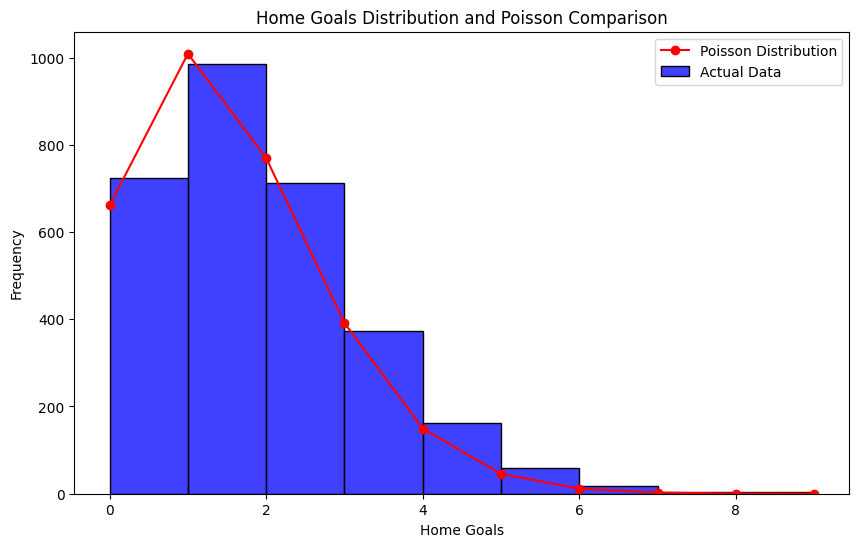

In [41]:
## Plotting Home goals distribution

plt.figure(figsize=(10, 6))
sns.histplot(epl['H_goals'], bins=range(min(epl['H_goals']), max(epl['H_goals']) + 1), kde=False, color='blue', label='Actual Data')

## Estimate the parameter for the Poisson distribution
mean_goals = np.mean(epl['H_goals'])

## Generate the Poisson distribution
poisson_dist = poisson(mu=mean_goals)

## Plot the Poisson distribution on the same plot
x = np.arange(0, max(epl['H_goals']) + 1)
poisson_probs = poisson_dist.pmf(x)
plt.plot(x, poisson_probs * len(epl), marker='o', linestyle='-', color='red', label='Poisson Distribution')

## Configure plot settings
plt.xlabel('Home Goals')
plt.ylabel('Frequency')
plt.title('Home Goals Distribution and Poisson Comparison')
plt.legend()

## Show the plot
plt.show()

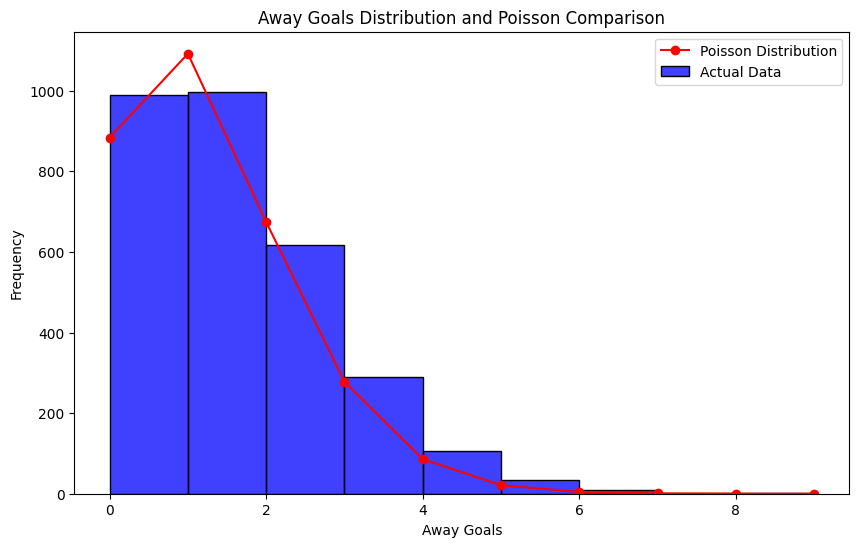

In [42]:
## Plotting Away goals distribution

plt.figure(figsize=(10, 6))
sns.histplot(epl['A_goals'], bins=range(min(epl['A_goals']), max(epl['A_goals']) + 1), kde=False, color='blue', label='Actual Data')

## Estimate the parameter for the Poisson distribution
mean_goals = np.mean(epl['A_goals'])

## Generate the Poisson distribution
poisson_dist = poisson(mu=mean_goals)

## Plot the Poisson distribution on the same plot
x = np.arange(0, max(epl['A_goals']) + 1)
poisson_probs = poisson_dist.pmf(x)
plt.plot(x, poisson_probs * len(epl), marker='o', linestyle='-', color='red', label='Poisson Distribution')

## Configure plot settings
plt.xlabel('Away Goals')
plt.ylabel('Frequency')
plt.title('Away Goals Distribution and Poisson Comparison')
plt.legend()

# Show the plot
plt.show()

# Data Preparation

In [43]:
## Making a new dataset for 2022/23 season from epl dataset

epl23 = epl[epl['Season']=='2223']

In [45]:
## Displaying epl23 dataset

epl23

,Date,HomeTeam,AwayTeam,H_goals,A_goals,Result,H_shots,A_shots,H_shots_target,A_shots_target,...,H_Shot_Acc,A_Shot_Acc,Game,Season,Home_Defend,Away_Defend,HomeForm,AwayForm,H_Chances_created,A_Chances_created
2660,05/08/2022,Crystal Palace,Arsenal,0,2,A,10,10,2,2,...,0.200000,0.200000,Crystal Palace_Arsenal,2223,6.65,6.77,1.0,1.2,1.4,1.0
2661,06/08/2022,Fulham,Liverpool,2,2,D,9,11,3,4,...,0.333333,0.363636,Fulham_Liverpool,2223,6.62,6.64,0.2,1.8,2.1,2.0
2662,06/08/2022,Bournemouth,Aston Villa,2,0,H,7,15,3,2,...,0.428571,0.133333,Bournemouth_Aston Villa,2223,6.59,6.57,1.0,1.4,2.1,1.0
2663,06/08/2022,Leeds,Wolves,2,1,H,12,15,4,6,...,0.333333,0.400000,Leeds_Wolves,2223,6.54,6.42,0.8,0.8,2.8,3.0
2664,06/08/2022,Newcastle,Nott'm Forest,2,0,H,23,5,10,0,...,0.434783,0.000000,Newcastle_Nott'm Forest,2223,6.82,6.36,1.2,0.4,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,28/05/2023,Everton,Bournemouth,1,0,H,13,7,6,2,...,0.461538,0.285714,Everton_Bournemouth,2223,6.64,6.46,0.8,1.0,4.2,1.0
3036,28/05/2023,Leeds,Tottenham,1,4,A,19,11,2,7,...,0.105263,0.636364,Leeds_Tottenham,2223,6.54,6.62,1.4,1.8,1.4,3.5
3037,28/05/2023,Leicester,West Ham,2,1,H,13,16,4,3,...,0.307692,0.187500,Leicester_West Ham,2223,6.59,6.50,1.0,1.6,2.8,1.5
3038,28/05/2023,Man United,Fulham,2,1,H,21,10,8,3,...,0.380952,0.300000,Man United_Fulham,2223,6.91,6.60,2.0,1.2,5.6,1.5


In [46]:
epl23.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'H_goals', 'A_goals', 'Result',
       'H_shots', 'A_shots', 'H_shots_target', 'A_shots_target', 'H_Corners',
       'A_Corners', 'Bet365odd_H', 'Bet365odd_D', 'Bet365odd_A',
       'H_BookingPoints', 'A_BookingPoints', 'H_Shot_Acc', 'A_Shot_Acc',
       'Game', 'Season', 'Home_Defend', 'Away_Defend', 'HomeForm', 'AwayForm',
       'H_Chances_created', 'A_Chances_created'],
      dtype='object')

In [47]:
## Separating epl23 dataset into two groups of Home and Away

epl23h = epl23.loc[:, ['Season','Game', 'H_goals','HomeForm','H_Shot_Acc','Away_Defend','H_Chances_created','H_BookingPoints','Result']]
epl23a = epl23.loc[:, ['Season','Game', 'A_goals','AwayForm','A_Shot_Acc','Home_Defend','A_Chances_created','A_BookingPoints','Result']]

In [ ]:
## Updating epl dataset

epl= epl[epl['Season']!='2223']

In [50]:
## Separating epl dataset into two groups of Home and Away

eplh = epl.loc[:, ['Season','Game', 'H_goals','HomeForm','H_Shot_Acc','Away_Defend','H_Chances_created','H_BookingPoints','Result']]
epla = epl.loc[:, ['Season','Game', 'A_goals','AwayForm','A_Shot_Acc','Home_Defend','A_Chances_created','A_BookingPoints','Result']]

# Ploting correlation between response variable and explanatory variables

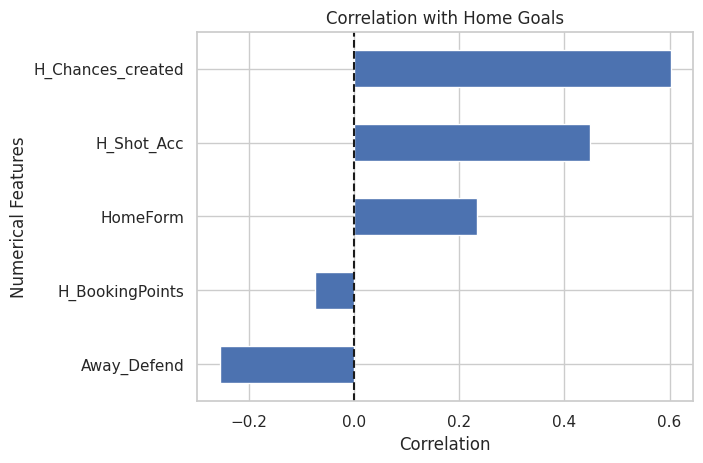

In [55]:
## correlation plot between response variable and explanatory variables for Home data

numerical_features_h = eplh.select_dtypes(include=[np.number])

## Calculate the correlation matrix
correlation_with_home_goals = numerical_features_h.corr()
correlation_with_home_goals = correlation_with_home_goals['H_goals'].drop('H_goals')

## Set up the plot
sns.set(style="whitegrid")  # Set the style of the plot

## Create a horizontal bar plot
ax = correlation_with_home_goals.sort_values().plot(kind='barh')

## Add vertical lines for zero correlation
ax.axvline(x=0, color='k', linestyle='--')

## Set labels and title
plt.xlabel("Correlation")
plt.ylabel("Numerical Features")
plt.title("Correlation with Home Goals")

## Show the plot
plt.show()

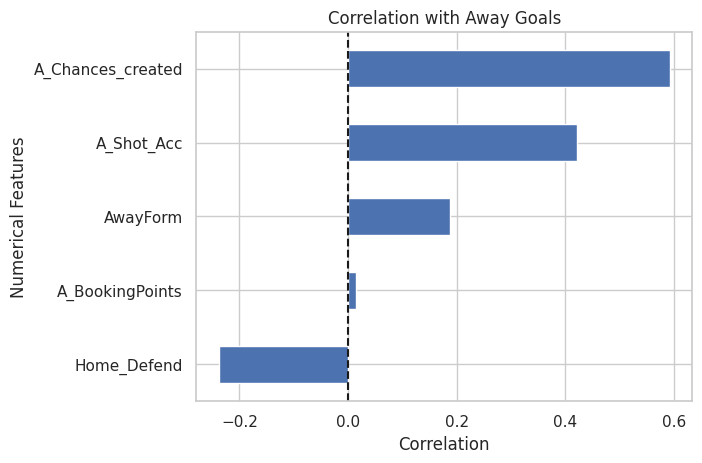

In [56]:
## correlation plot between response variable and explanatory variables for Away data

numerical_features_a = epla.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_with_away_goals = numerical_features_a.corr()
correlation_with_away_goals = correlation_with_away_goals['A_goals'].drop('A_goals')

# Set up the plot
sns.set(style="whitegrid")  # Set the style of the plot

# Create a horizontal bar plot
ax = correlation_with_away_goals.sort_values().plot(kind='barh')

# Add vertical lines for zero correlation
ax.axvline(x=0, color='k', linestyle='--')

# Set labels and title
plt.xlabel("Correlation")
plt.ylabel("Numerical Features")
plt.title("Correlation with Away Goals")

# Show the plot
plt.show()

# Training & Testing

In [58]:
## Home data training and testing

X_trainH = eplh[['HomeForm','H_Shot_Acc','Away_Defend','H_Chances_created','H_BookingPoints']]
Y_trainH = eplh['H_goals']
X_testH = epl23h[['HomeForm','H_Shot_Acc','Away_Defend','H_Chances_created','H_BookingPoints']]
Y_testH = epl23h['H_goals']

In [59]:
## Away data training and testing

X_trainA = epla[[ 'AwayForm','A_Shot_Acc','Home_Defend','A_Chances_created','A_BookingPoints']]
Y_trainA = epla['A_goals']
X_testA = epl23a[[ 'AwayForm','A_Shot_Acc','Home_Defend','A_Chances_created','A_BookingPoints']]
Y_testA = epl23a['A_goals']

# Fitting Poisson Regresson model

In [70]:
## Fitting Poisson Regresson model for Home data

X_train_with_intercept = sm.add_constant(X_trainH)

## Poisson regression(GLM)
poisson_model_home = sm.GLM(Y_trainH, X_train_with_intercept, family=sm.families.Poisson()).fit()
print(poisson_model_home.summary())

X_test_with_intercept = sm.add_constant(X_testH)

predicted_goals_home = poisson_model_home.predict(X_test_with_intercept)
print("=====================================================================================")
predicted_goals_home

                 Generalized Linear Model Regression Results                  
Dep. Variable:                H_goals   No. Observations:                 3040
Model:                            GLM   Df Residuals:                     3034
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4152.8
Date:                Fri, 18 Aug 2023   Deviance:                       2528.0
Time:                        12:07:10   Pearson chi2:                 2.09e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3520      0.71

2660    0.800129
2661    0.978101
2662    1.143285
2663    1.368109
2664    3.584263
          ...   
3035    1.916512
3036    0.602380
3037    1.463466
3038    2.541200
3039    4.288756
Length: 380, dtype: float64

In [71]:
## Fitting Poisson Regresson model for Home data

X_train_with_intercept = sm.add_constant(X_trainA)

## Poisson regression(GLM)
poisson_model_away = sm.GLM(Y_trainA, X_train_with_intercept, family=sm.families.Poisson()).fit()

print(poisson_model_away.summary())

X_test_with_intercept = sm.add_constant(X_testA)

predicted_goals_away = poisson_model_away.predict(X_test_with_intercept)
print("=====================================================================================")
predicted_goals_away

                 Generalized Linear Model Regression Results                  
Dep. Variable:                A_goals   No. Observations:                 3040
Model:                            GLM   Df Residuals:                     3034
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3856.3
Date:                Fri, 18 Aug 2023   Deviance:                       2743.9
Time:                        12:07:25   Pearson chi2:                 2.28e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3383
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4050      0.74

2660    0.741296
2661    1.391327
2662    0.729688
2663    1.809134
2664    0.349690
          ...   
3035    0.794577
3036    3.144637
3037    0.959868
3038    0.785454
3039    2.500966
Length: 380, dtype: float64

# Creating Prediction dataset

In [63]:
## Creating Prediction dataset epl_pred

epl_pred = epl23[['Season','HomeTeam','AwayTeam','Game']]

## Getting predicted values from Poisson regression

epl_pred['A_goals'] = predicted_goals_away
epl_pred['H_goals'] = predicted_goals_home

<ipython-input-63-d1318a247b61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_pred['A_goals'] = predicted_goals_away
<ipython-input-63-d1318a247b61>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl_pred['H_goals'] = predicted_goals_home


In [64]:
## Displaying epl_pred

epl_pred

,Season,HomeTeam,AwayTeam,Game,A_goals,H_goals
2660,2223,Crystal Palace,Arsenal,Crystal Palace_Arsenal,0.741296,0.800129
2661,2223,Fulham,Liverpool,Fulham_Liverpool,1.391327,0.978101
2662,2223,Bournemouth,Aston Villa,Bournemouth_Aston Villa,0.729688,1.143285
2663,2223,Leeds,Wolves,Leeds_Wolves,1.809134,1.368109
2664,2223,Newcastle,Nott'm Forest,Newcastle_Nott'm Forest,0.349690,3.584263
...,...,...,...,...,...,...
3035,2223,Everton,Bournemouth,Everton_Bournemouth,0.794577,1.916512
3036,2223,Leeds,Tottenham,Leeds_Tottenham,3.144637,0.602380
3037,2223,Leicester,West Ham,Leicester_West Ham,0.959868,1.463466
3038,2223,Man United,Fulham,Man United_Fulham,0.785454,2.541200


# Monte Carlo Simulation

In [65]:
## Runing Monte Carlo simulation for 100,000 runs

num_simulations = 100000

## Function to simulate goals using Poisson distribution
def simulate_goals(mean_goals, num_simulations):
    return np.random.poisson(lam=mean_goals, size=num_simulations)

## Function to assign the final result based on the most common outcome
def assign_final_result(home_wins, away_wins, draws):
    if home_wins > away_wins and home_wins > draws:
        return "H"
    elif away_wins > home_wins and away_wins > draws:
        return "A"
    else:
        return "D"

## Simulate home and away goals for each fixture
final_results = []
for index, fixture in epl_pred.iterrows():
    home_team, away_team = fixture["HomeTeam"], fixture["AwayTeam"]
    mean_home_goals, mean_away_goals = fixture["H_goals"], fixture["A_goals"]
    home_goals = simulate_goals(mean_home_goals, num_simulations)
    away_goals = simulate_goals(mean_away_goals, num_simulations)

    ## Count the number of times home goals are greater than away goals,
    ## the number of times away goals are greater than home goals,
    ## and the number of draws (when home goals and away goals are equal)
    home_wins = np.sum(home_goals > away_goals)
    away_wins = np.sum(home_goals < away_goals)
    draws = np.sum(home_goals == away_goals)

    ## Assign the final result based on the most common outcome
    final_result = assign_final_result(home_wins, away_wins, draws)
    final_results.append((home_team, away_team, final_result))

## Convert results to a Pandas DataFrame
final_results = pd.DataFrame(final_results,columns=['HomeTeam','AwayTeam', 'Result'])

## Function to calculate probabilities for home win, away win, and draw
def calculate_probabilities(home_goals, away_goals):
    total_simulations = len(home_goals)
    home_wins = np.sum(home_goals > away_goals)
    away_wins = np.sum(home_goals < away_goals)
    draws = np.sum(home_goals == away_goals)
    return home_wins / total_simulations, away_wins / total_simulations, draws / total_simulations

## Simulate home and away goals for each fixture and calculate probabilities
probabilities = []
for index, fixture in epl_pred.iterrows():
    home_team, away_team = fixture["HomeTeam"], fixture["AwayTeam"]
    mean_home_goals, mean_away_goals = fixture["H_goals"], fixture["A_goals"]
    home_goals = simulate_goals(mean_home_goals, num_simulations)
    away_goals = simulate_goals(mean_away_goals, num_simulations)

    home_prob, away_prob, draw_prob = calculate_probabilities(home_goals, away_goals)
    probabilities.append((home_team, away_team, home_prob, away_prob, draw_prob))

## Convert probabilities to a Pandas DataFrame
probabilities_df = pd.DataFrame(probabilities, columns=["HomeTeam", "AwayTeam", "HomeWinProb", "AwayWinProb", "DrawProb"])


In [72]:
## Adding datapoint Game for merging with epl_pred

final_results['Game'] = final_results['HomeTeam']+'_'+final_results['AwayTeam']

In [74]:
## Display simulation results

final_results

,HomeTeam,AwayTeam,Result,Game
0,Crystal Palace,Arsenal,D,Crystal Palace_Arsenal
1,Fulham,Liverpool,A,Fulham_Liverpool
2,Bournemouth,Aston Villa,H,Bournemouth_Aston Villa
3,Leeds,Wolves,A,Leeds_Wolves
4,Newcastle,Nott'm Forest,H,Newcastle_Nott'm Forest
...,...,...,...,...
375,Everton,Bournemouth,H,Everton_Bournemouth
376,Leeds,Tottenham,A,Leeds_Tottenham
377,Leicester,West Ham,H,Leicester_West Ham
378,Man United,Fulham,H,Man United_Fulham


In [75]:
## Creating a copy of epl_pred

epl_pred23 = epl_pred.copy()
epl_pred23.drop(['A_goals','H_goals'],axis = 1, inplace = True)

In [76]:
epl_pred23

,Season,HomeTeam,AwayTeam,Game
2660,2223,Crystal Palace,Arsenal,Crystal Palace_Arsenal
2661,2223,Fulham,Liverpool,Fulham_Liverpool
2662,2223,Bournemouth,Aston Villa,Bournemouth_Aston Villa
2663,2223,Leeds,Wolves,Leeds_Wolves
2664,2223,Newcastle,Nott'm Forest,Newcastle_Nott'm Forest
...,...,...,...,...
3035,2223,Everton,Bournemouth,Everton_Bournemouth
3036,2223,Leeds,Tottenham,Leeds_Tottenham
3037,2223,Leicester,West Ham,Leicester_West Ham
3038,2223,Man United,Fulham,Man United_Fulham


In [77]:
## Merging results from monte carlo simulation with epl_pred23

epl_pred23 = epl_pred23.merge(final_results[['Game','Result']], on= ['Game'],how='left')

In [78]:
## Display final epl_pred23

epl_pred23

,Season,HomeTeam,AwayTeam,Game,Result
0,2223,Crystal Palace,Arsenal,Crystal Palace_Arsenal,D
1,2223,Fulham,Liverpool,Fulham_Liverpool,A
2,2223,Bournemouth,Aston Villa,Bournemouth_Aston Villa,H
3,2223,Leeds,Wolves,Leeds_Wolves,A
4,2223,Newcastle,Nott'm Forest,Newcastle_Nott'm Forest,H
...,...,...,...,...,...
375,2223,Everton,Bournemouth,Everton_Bournemouth,H
376,2223,Leeds,Tottenham,Leeds_Tottenham,A
377,2223,Leicester,West Ham,Leicester_West Ham,H
378,2223,Man United,Fulham,Man United_Fulham,H


# Predicted Premier League Table 2022/23 season

In [79]:
team_stats = {}

## Function to update team statistics
def update_team_stats(team, result):
    if team not in team_stats:
        team_stats[team] = {"MatchesPlayed": 0, "Wins": 0, "Losses": 0, "Draws": 0, "Points": 0}
    team_stats[team][result] += 1
    team_stats[team]["MatchesPlayed"] += 1

## Process the EPL predictions to update team statistics
for index, row in epl_pred23.iterrows():
    home_team, away_team, result = row["HomeTeam"], row["AwayTeam"], row["Result"]

    if result == "H":
        update_team_stats(home_team, "Wins")
        update_team_stats(away_team, "Losses")
        team_stats[home_team]["Points"] += 3
    elif result == "A":
        update_team_stats(away_team, "Wins")
        update_team_stats(home_team, "Losses")
        team_stats[away_team]["Points"] += 3
    elif result == "D":
        update_team_stats(home_team, "Draws")
        update_team_stats(away_team, "Draws")
        team_stats[home_team]["Points"] += 1
        team_stats[away_team]["Points"] += 1

## Convert the team_stats dictionary to a DataFrame
epl23_pred = pd.DataFrame.from_dict(team_stats, orient="index").reset_index()
epl23_pred = epl23_pred.rename(columns={
    "index": "Team",
    "MatchesPlayed": "MatchesPlayed",
    "Wins": "Wins",
    "Losses": "Losses",
    "Draws": "Draws",
    "Points": "Points"
})

## Print the table of team statistics
epl23_pred = epl23_pred.sort_values(by="Points", ascending=False).reset_index(drop=True)

In [80]:
## Display predicted Premier League table

epl23_pred

,Team,MatchesPlayed,Wins,Losses,Draws,Points
0,Man City,38,31,6,1,94
1,Brighton,38,30,8,0,90
2,Arsenal,38,29,7,2,89
3,Man United,38,25,11,2,77
4,Newcastle,38,25,12,1,76
5,Liverpool,38,23,15,0,69
6,Tottenham,38,21,17,0,63
7,Leicester,38,20,18,0,60
8,Brentford,38,18,19,1,55
9,Crystal Palace,38,18,19,1,55


# True Premier League Table 2022/23 season

In [82]:
team_stats = {}

## Function to update team statistics
def update_team_stats(team, result):
    if team not in team_stats:
        team_stats[team] = {"MatchesPlayed": 0, "Wins": 0, "Losses": 0, "Draws": 0, "Points": 0}
    team_stats[team][result] += 1
    team_stats[team]["MatchesPlayed"] += 1

## Process the EPL predictions to update team statistics
for index, row in epl23.iterrows():
    home_team, away_team, result = row["HomeTeam"], row["AwayTeam"], row["Result"]

    if result == "H":
        update_team_stats(home_team, "Wins")
        update_team_stats(away_team, "Losses")
        team_stats[home_team]["Points"] += 3
    elif result == "A":
        update_team_stats(away_team, "Wins")
        update_team_stats(home_team, "Losses")
        team_stats[away_team]["Points"] += 3
    elif result == "D":
        update_team_stats(home_team, "Draws")
        update_team_stats(away_team, "Draws")
        team_stats[home_team]["Points"] += 1
        team_stats[away_team]["Points"] += 1

## Convert the team_stats dictionary to a DataFrame
epl23_T = pd.DataFrame.from_dict(team_stats, orient="index").reset_index()
epl23_T = epl23_T.rename(columns={
    "index": "Team",
    "MatchesPlayed": "MatchesPlayed",
    "Wins": "Wins",
    "Losses": "Losses",
    "Draws": "Draws",
    "Points": "Points"
})

## Print the table of team statistics
epl23_T = epl23_T.sort_values(by="Points", ascending=False).reset_index(drop=True)

In [83]:
## Display true Premier League table

epl23_T

,Team,MatchesPlayed,Wins,Losses,Draws,Points
0,Man City,38,28,5,5,89
1,Arsenal,38,26,6,6,84
2,Man United,38,23,9,6,75
3,Newcastle,38,19,5,14,71
4,Liverpool,38,19,9,10,67
5,Brighton,38,18,12,8,62
6,Aston Villa,38,18,13,7,61
7,Tottenham,38,18,14,6,60
8,Brentford,38,15,9,14,59
9,Fulham,38,15,16,7,52


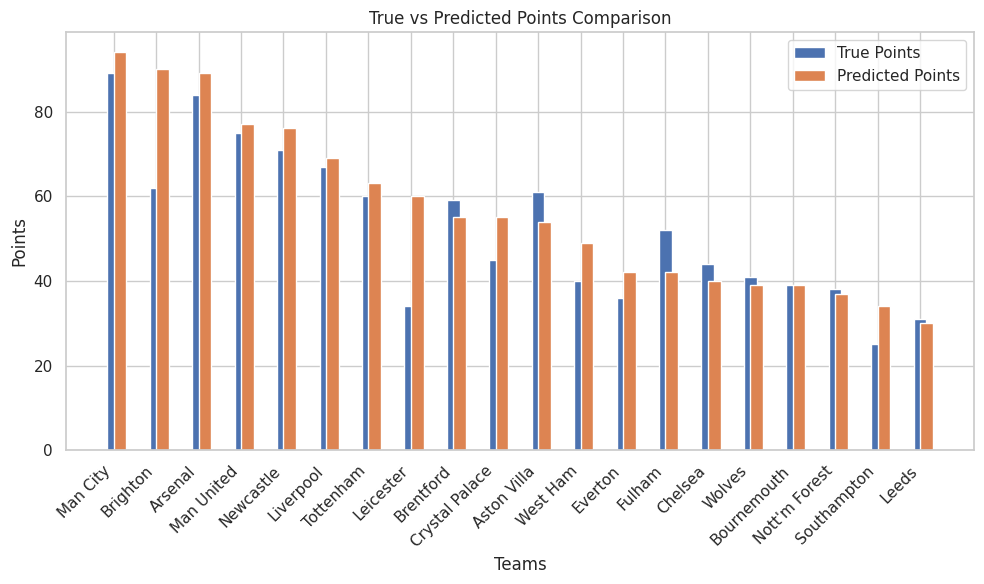

In [84]:
## Display predicted points & true points for a team in 2022/23 season

merged_df = pd.merge(epl23_pred, epl23_T, left_on='Team', right_on='Team',suffixes=('_pred', '_true'))

## Set the figure size
plt.figure(figsize=(10, 6))

## Plot the true and predicted points side by side
plt.bar(merged_df['Team'], merged_df['Points_true'], width=0.3, label='True Points')
plt.bar(merged_df['Team'], merged_df['Points_pred'], width=0.3, label='Predicted Points', align='edge')

plt.xlabel('Teams')
plt.ylabel('Points')
plt.title('True vs Predicted Points Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Probabilities Comparison with Betting site(Bet365)

In [87]:
## Converting odds to probabilities

Bet365['H_bookies_prob'] = (1/Bet365['Bet365odd_H'])/((1/Bet365['Bet365odd_H'])+(1/Bet365['Bet365odd_D'])+(1/Bet365['Bet365odd_A']))
Bet365['D_bookies_prob'] = (1/Bet365['Bet365odd_D'])/((1/Bet365['Bet365odd_H'])+(1/Bet365['Bet365odd_D'])+(1/Bet365['Bet365odd_A']))
Bet365['A_bookies_prob'] = (1/Bet365['Bet365odd_A'])/((1/Bet365['Bet365odd_H'])+(1/Bet365['Bet365odd_D'])+(1/Bet365['Bet365odd_A']))

In [88]:
Bet365.drop(['Bet365odd_H','Bet365odd_D','Bet365odd_A'],axis = 1, inplace=True)

In [89]:
## Creating dataset for 2022/23 season with betting probabilities

Bet365_23 = Bet365[Bet365['Season'] == '2223']

In [91]:
## Displaying Betting data for 2022/23 season

Bet365_23

,Season,Game,HomeTeam,AwayTeam,H_bookies_prob,D_bookies_prob,A_bookies_prob
0,2223,Crystal Palace_Arsenal,Crystal Palace,Arsenal,0.225381,0.262944,0.511675
1,2223,Fulham_Liverpool,Fulham,Liverpool,0.085960,0.157593,0.756447
2,2223,Bournemouth_Aston Villa,Bournemouth,Aston Villa,0.253394,0.271493,0.475113
3,2223,Leeds_Wolves,Leeds,Wolves,0.422853,0.279829,0.297318
4,2223,Newcastle_Nott'm Forest,Newcastle,Nott'm Forest,0.570440,0.249192,0.180368
...,...,...,...,...,...,...,...
375,2223,Everton_Bournemouth,Everton,Bournemouth,0.639344,0.213115,0.147541
376,2223,Leeds_Tottenham,Leeds,Tottenham,0.342544,0.247893,0.409563
377,2223,Leicester_West Ham,Leicester,West Ham,0.491839,0.247214,0.260948
378,2223,Man United_Fulham,Man United,Fulham,0.626401,0.216998,0.156600


In [92]:
## Displaying simulation probabilities for 2022/23 season

probabilities_df

,HomeTeam,AwayTeam,HomeWinProb,AwayWinProb,DrawProb
0,Crystal Palace,Arsenal,0.33875,0.30353,0.35772
1,Fulham,Liverpool,0.26214,0.46829,0.26957
2,Bournemouth,Aston Villa,0.45541,0.23493,0.30966
3,Leeds,Wolves,0.29244,0.47788,0.22968
4,Newcastle,Nott'm Forest,0.93186,0.01464,0.05350
...,...,...,...,...,...
375,Everton,Bournemouth,0.63596,0.14854,0.21550
376,Leeds,Tottenham,0.04173,0.86215,0.09612
377,Leicester,West Ham,0.48463,0.24878,0.26659
378,Man United,Fulham,0.75249,0.09434,0.15317


In [93]:
## Merging the two dataset of probabilities

merged_probabilities = pd.merge(Bet365_23, probabilities_df, left_on=['HomeTeam','AwayTeam'], right_on=['HomeTeam','AwayTeam'])


In [95]:
## Displaying the merged dataset

merged_probabilities

,Season,Game,HomeTeam,AwayTeam,H_bookies_prob,D_bookies_prob,A_bookies_prob,HomeWinProb,AwayWinProb,DrawProb
0,2223,Crystal Palace_Arsenal,Crystal Palace,Arsenal,0.225381,0.262944,0.511675,0.33875,0.30353,0.35772
1,2223,Fulham_Liverpool,Fulham,Liverpool,0.085960,0.157593,0.756447,0.26214,0.46829,0.26957
2,2223,Bournemouth_Aston Villa,Bournemouth,Aston Villa,0.253394,0.271493,0.475113,0.45541,0.23493,0.30966
3,2223,Leeds_Wolves,Leeds,Wolves,0.422853,0.279829,0.297318,0.29244,0.47788,0.22968
4,2223,Newcastle_Nott'm Forest,Newcastle,Nott'm Forest,0.570440,0.249192,0.180368,0.93186,0.01464,0.05350
...,...,...,...,...,...,...,...,...,...,...
375,2223,Everton_Bournemouth,Everton,Bournemouth,0.639344,0.213115,0.147541,0.63596,0.14854,0.21550
376,2223,Leeds_Tottenham,Leeds,Tottenham,0.342544,0.247893,0.409563,0.04173,0.86215,0.09612
377,2223,Leicester_West Ham,Leicester,West Ham,0.491839,0.247214,0.260948,0.48463,0.24878,0.26659
378,2223,Man United_Fulham,Man United,Fulham,0.626401,0.216998,0.156600,0.75249,0.09434,0.15317


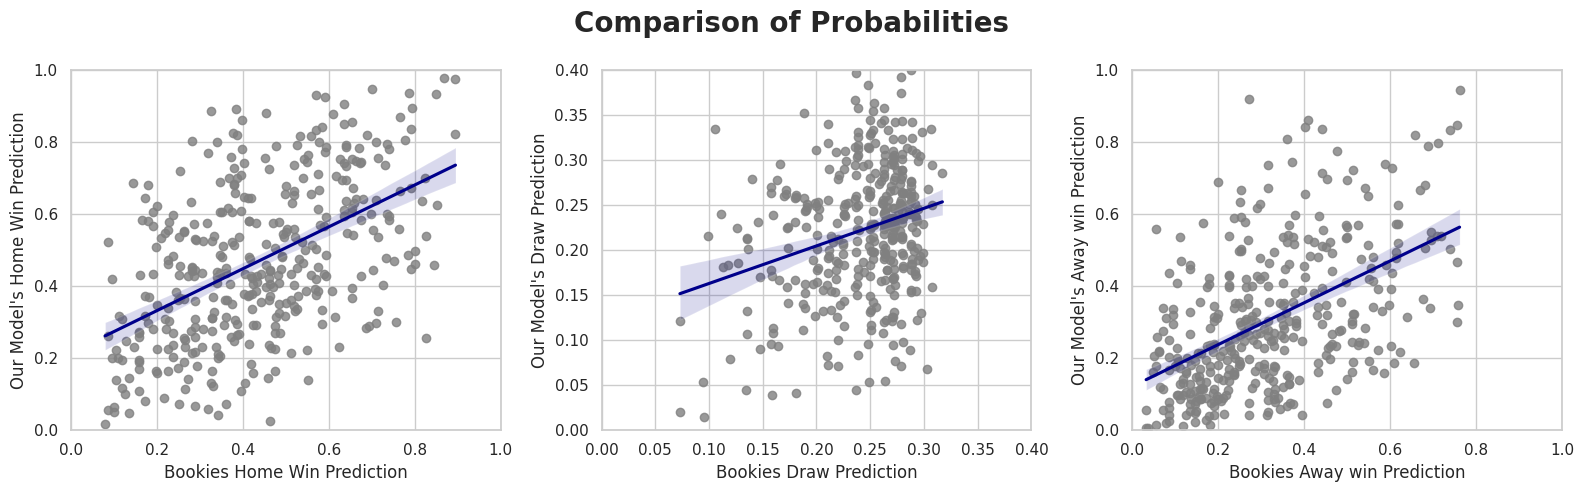

In [102]:
## Plotting the probabilities with regression line
plt.figure(figsize=(16, 5))

scatter_color = "grey"
line_color = "darkblue"


plt.subplot(1, 3, 1)
sns.regplot(x="H_bookies_prob", y="HomeWinProb", data=merged_probabilities,
            scatter_kws={"color": scatter_color},
            line_kws={"color": line_color})
plt.xlabel("Bookies Home Win Prediction")
plt.ylabel("Our Model's Home Win Prediction")
plt.xlim(0, 1)
plt.ylim(0, 1)


plt.subplot(1, 3, 2)
sns.regplot(x="D_bookies_prob", y="DrawProb", data=merged_probabilities,
            scatter_kws={"color":scatter_color},
            line_kws={"color": line_color})
plt.xlabel("Bookies Draw Prediction")
plt.ylabel("Our Model's Draw Prediction")
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)

plt.subplot(1, 3, 3)
sns.regplot(x="A_bookies_prob", y="AwayWinProb", data=merged_probabilities,
            scatter_kws={"color": scatter_color},
            line_kws={"color": line_color})
plt.xlabel("Bookies Away win Prediction")
plt.ylabel("Our Model's Away win Prediction")
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.suptitle("Comparison of Probabilities",fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

# Simulation for 2023/24 season


In [106]:
## Getting Home teams & Away teams names

HomeTeams = list(set(epl_pred['HomeTeam']))
AwayTeams = list(set(epl_pred['AwayTeam']))

In [107]:
## Removing relegated teams

Teamstoremove = ['Southampton','Leicester','Leeds']

HomeTeams = [i for i in HomeTeams if i not in Teamstoremove]
AwayTeams = [i for i in AwayTeams if i not in Teamstoremove]

In [108]:
## Adding promoted teams

HomeTeams.extend(['Burnley', 'Sheffield United', 'Luton Town'])
AwayTeams.extend(['Burnley', 'Sheffield United', 'Luton Town'])

In [109]:
## Calculating expected goals of every Home team

HomeTeams_xG = []
for i in HomeTeams:
  if i in ['Burnley', 'Sheffield United', 'Luton Town']:

    ## Hardcoding values for promoted teams
    if i == 'Burnley':
      xG = 1.457
    elif i == 'Sheffield United':
      xG = 1.203
    else:
      xG = 1.082

  else:
    df=epl_pred.loc[epl_pred['HomeTeam'] == i]
    Goals=list(df['H_goals'])
    xG = stat.mean(Goals)
  HomeTeams_xG.append(round(xG,3))
print(HomeTeams_xG)

[1.713, 1.534, 2.266, 1.38, 2.532, 2.443, 1.262, 1.697, 1.997, 1.447, 1.236, 1.396, 2.025, 2.057, 1.476, 1.39, 2.115, 1.457, 1.203, 1.082]


In [110]:
## Calculating expected goals of every Away team

AwayTeams_xG=[]
for i in AwayTeams:
  if i in ['Burnley', 'Sheffield United', 'Luton Town']:

    ## Hardcoding values for promoted teams
    if i == 'Burnley':
      xG = 1.207
    elif i == 'Sheffield United':
      xG = 0.994
    else:
      xG = 0.954

  else:
    df=epl_pred.loc[epl_pred['AwayTeam'] == i]
    Goals=list(df['A_goals'])
    xG = stat.mean(Goals)
  AwayTeams_xG.append(round(xG,3))
print(AwayTeams_xG)

[1.523, 1.055, 1.722, 1.185, 1.843, 1.383, 1.326, 1.091, 1.513, 1.224, 1.184, 0.821, 1.192, 1.51, 0.854, 1.559, 1.197, 1.207, 0.994, 0.954]


In [111]:
## Create dataset for 2023/24 Home teams

epl24_H = pd.DataFrame(HomeTeams)
epl24_H['xG'] = HomeTeams_xG
epl24_H.columns = ['HomeTeam','xG']

In [112]:
## Create dataset for 2023/24 Away teams

epl24_A = pd.DataFrame(AwayTeams)
epl24_A['xG'] = AwayTeams_xG
epl24_A.columns = ['AwayTeam','xG']


In [114]:
## Merging the Home and Away dataset

epl24_data = []

for hindex, hrow in epl24_H.iterrows():
    for aindex, arow in epl24_A.iterrows():
        if hrow['HomeTeam'] != arow['AwayTeam']:
            new_row = {
                'HomeTeam': hrow['HomeTeam'],
                'AwayTeam': arow['AwayTeam'],
                'xG_home': hrow['xG'],
                'xG_away': arow['xG']
            }
            epl24_data.append(new_row)

epl24 = pd.DataFrame(epl24_data)

In [115]:
## Display merged dataset

epl24

,HomeTeam,AwayTeam,xG_home,xG_away
0,Newcastle,Everton,1.713,1.055
1,Newcastle,Brighton,1.713,1.722
2,Newcastle,West Ham,1.713,1.185
3,Newcastle,Man City,1.713,1.843
4,Newcastle,Arsenal,1.713,1.383
...,...,...,...,...
375,Luton Town,Wolves,1.082,0.854
376,Luton Town,Liverpool,1.082,1.559
377,Luton Town,Fulham,1.082,1.197
378,Luton Town,Burnley,1.082,1.207


# Monte Carlo Simulation

In [116]:
## Runing Monte Carlo simulation for 100,000 runs

num_simulations = 100

## Function to simulate goals using Poisson distribution
def simulate_goals(mean_goals, num_simulations):
    return np.random.poisson(lam=mean_goals, size=num_simulations)

## Function to assign the final result based on the most common outcome
def assign_final_result(home_wins, away_wins, draws):
    if home_wins > away_wins and home_wins > draws:
        return "H"
    elif away_wins > home_wins and away_wins > draws:
        return "A"
    else:
        return "D"

## Simulate home and away goals for each fixture
final_results = []
for index, fixture in epl24.iterrows():
    home_team, away_team = fixture["HomeTeam"], fixture["AwayTeam"]
    mean_home_goals, mean_away_goals = fixture["xG_home"], fixture["xG_away"]
    home_goals = simulate_goals(mean_home_goals, num_simulations)
    away_goals = simulate_goals(mean_away_goals, num_simulations)

    ## Count the number of times home goals are greater than away goals,
    ## the number of times away goals are greater than home goals,
    ## and the number of draws (when home goals and away goals are equal)
    home_wins = np.sum(home_goals > away_goals)
    away_wins = np.sum(home_goals < away_goals)
    draws = np.sum(home_goals == away_goals)

    ## Assign the final result based on the most common outcome
    final_result = assign_final_result(home_wins, away_wins, draws)
    final_results.append((home_team, away_team, final_result))

final_results = pd.DataFrame(final_results,columns=['HomeTeam','AwayTeam', 'Result'])

# Predicted Premier League Table 2023/24 season

In [117]:
team_stats = {}

## Function to update team statistics
def update_team_stats(team, result):
    if team not in team_stats:
        team_stats[team] = {"MatchesPlayed": 0, "Wins": 0, "Losses": 0, "Draws": 0, "Points": 0}
    team_stats[team][result] += 1
    team_stats[team]["MatchesPlayed"] += 1

## Process the EPL predictions to update team statistics
for index, row in final_results.iterrows():
    home_team, away_team, result = row["HomeTeam"], row["AwayTeam"], row["Result"]

    if result == "H":
        update_team_stats(home_team, "Wins")
        update_team_stats(away_team, "Losses")
        team_stats[home_team]["Points"] += 3
    elif result == "A":
        update_team_stats(away_team, "Wins")
        update_team_stats(home_team, "Losses")
        team_stats[away_team]["Points"] += 3
    elif result == "D":
        update_team_stats(home_team, "Draws")
        update_team_stats(away_team, "Draws")
        team_stats[home_team]["Points"] += 1
        team_stats[away_team]["Points"] += 1

## Convert the team_stats dictionary to a DataFrame
epl_pred24 = pd.DataFrame.from_dict(team_stats, orient="index").reset_index()
epl_pred24 = epl_pred24.rename(columns={
    "index": "Team",
    "MatchesPlayed": "MatchesPlayed",
    "Wins": "Wins",
    "Losses": "Losses",
    "Draws": "Draws",
    "Points": "Points"
})

## Print the table of team statistics
epl_pred24 = epl_pred24.sort_values(by="Points", ascending=False).reset_index(drop=True)

In [119]:
## Display predicted Premier League table

epl_pred24

,Team,MatchesPlayed,Wins,Losses,Draws,Points
0,Man City,38,33,5,0,99
1,Brighton,38,29,9,0,87
2,Liverpool,38,29,9,0,87
3,Newcastle,38,26,12,0,78
4,Tottenham,38,25,11,2,77
5,Arsenal,38,25,12,1,76
6,Man United,38,23,12,3,72
7,Brentford,38,21,16,1,64
8,Chelsea,38,19,17,2,59
9,Aston Villa,38,19,19,0,57
